In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr



#### ***RQ1: EDA***

In [4]:
df = pd.read_csv("/Users/riccardo.soleo/Desktop/ADM HW2/steam_reviews.csv")

In [6]:

print(df.shape)

(21747371, 23)


il file contiene 21.747.371 righe e 23 colonne: ogni riga è una recensione, ogni colonna aspetti specifici della recensione, del gioco recensito o del giocatore recensente.

In [7]:
n_giochi=df['app_id'].nunique()
n_giochi1=df['app_name'].nunique()
print(n_giochi1)


315


Le recensioni riguardano 315 giochi.

Vediamo i valori mancanti, fondamentali per comprendere al meglio il dataset.

In [14]:
 df.isnull().sum() 


Unnamed: 0                            0
app_id                                0
app_name                              0
review_id                             0
language                              0
review                            33748
timestamp_created                     0
timestamp_updated                     0
recommended                           0
votes_helpful                         0
votes_funny                           0
weighted_vote_score                   0
comment_count                         0
steam_purchase                        0
received_for_free                     0
written_during_early_access           0
author.steamid                        0
author.num_games_owned                0
author.num_reviews                    0
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         25682
author.last_played                    2
dtype: int64

Il carattere review ha 33748 valori mancanti, ciò indica il numero di giocatori che ha fatto una recensione consigliando o sconsigliando un gioco senza commentare.
Troviamo anche 25682 persone che hanno fatto una recensione senza averci giocato.

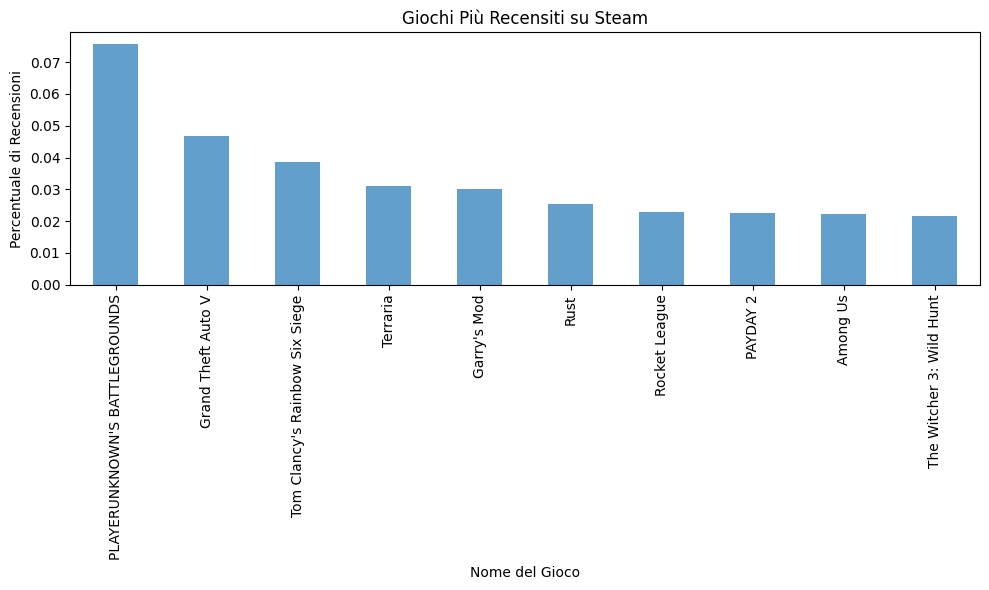

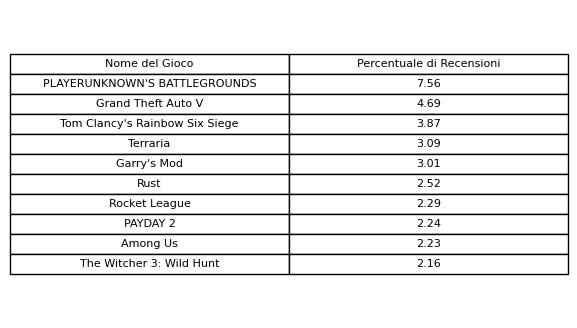

In [21]:

cont_recensioni = df['app_name'].value_counts(normalize=True)
primi10 = cont_recensioni.head(10)  

#  grafico
plt.figure(figsize=(10, 6))  
primi10.plot(kind='bar', alpha=0.7)
plt.xlabel('Nome del Gioco')
plt.ylabel('Percentuale di Recensioni')
plt.title('Giochi Più Recensiti su Steam')
plt.tight_layout()


plt.show()


fig, ax = plt.subplots(figsize=(6, 4))  
ax.axis('tight')  
ax.axis('off')    

#tabella
table_data = primi10.reset_index()
table_data.columns = ['Nome del Gioco', 'Percentuale di Recensioni']
table_data['Percentuale di Recensioni'] = (table_data['Percentuale di Recensioni'] * 100).round(2)  


tabella = ax.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='center')


tabella.scale(1.2, 1.2)


plt.show()

come possiamo vedere dall'istogramma di frequenza, il gioco più recensito è "Battleground" con una percentuale di 7.56% di recensioni a favore, a seguire "GTA 5" con il 4.69%  e "rainbow six siege" 3.89%.


28
language
english       0.443062
schinese      0.173123
russian       0.108008
brazilian     0.038512
spanish       0.037399
german        0.034606
turkish       0.029239
koreana       0.028216
french        0.024911
polish        0.022786
tchinese      0.010034
czech         0.006161
italian       0.006130
thai          0.005863
japanese      0.003759
portuguese    0.003742
swedish       0.003689
dutch         0.003566
hungarian     0.003265
latam         0.003224
danish        0.002571
finnish       0.002516
norwegian     0.001692
romanian      0.001505
ukrainian     0.000973
greek         0.000665
bulgarian     0.000481
vietnamese    0.000303
Name: proportion, dtype: float64


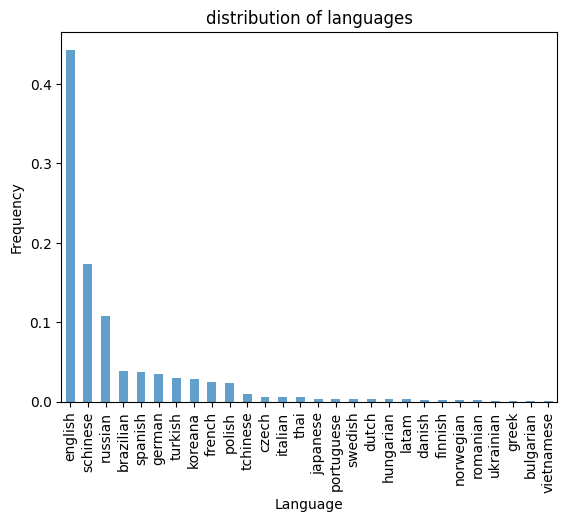

In [9]:
n_lingue=df['language'].nunique()
print(n_lingue)
frequenza_lingue = df['language'].value_counts(normalize=True)
print(frequenza_lingue)
df['language'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.xlabel('language')
plt.ylabel('frequency')
plt.title('distribution of languages')
plt.show()

le recensioni sono scritte in 28 diverse lingue, in particolare circa il 40% sono scritte in inglese, il 17% in cinese(mandarino?) e il 10% in russo. le altre lingue compaiono in frequenza minore.

<Axes: title={'center': 'Numero di Recensioni per Anno'}, xlabel='timestamp_created'>

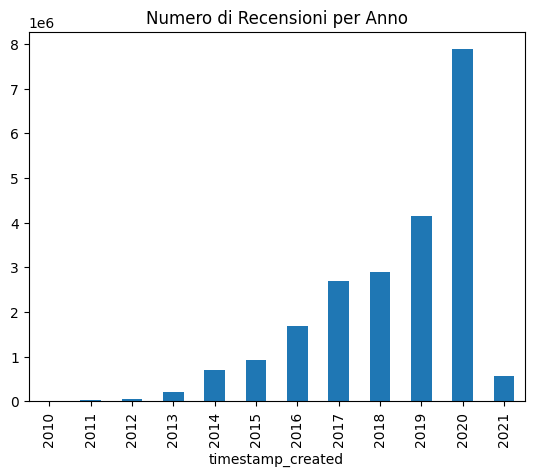

In [18]:
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')
df['timestamp_created'].dt.year.value_counts().sort_index().plot(kind='bar', title='Numero di Recensioni per Anno')

l'anno con il maggior numero di recensioni è il 2020, ciò è dovuto molto probabilmente al fatto che è l'anno in cui è scoppiata l'epidemia di Covid-19, e le persone costrette a rimanere in casa hanno avuto più tempo per giocare(e auindi recensire).
notiamo un trend crescente del numero di recensioni fino al 2020, mentre nel 2021 il numero è diminuito in maniera notevole.

### ***RQ2***


let's identify which is most and the least reviewed.

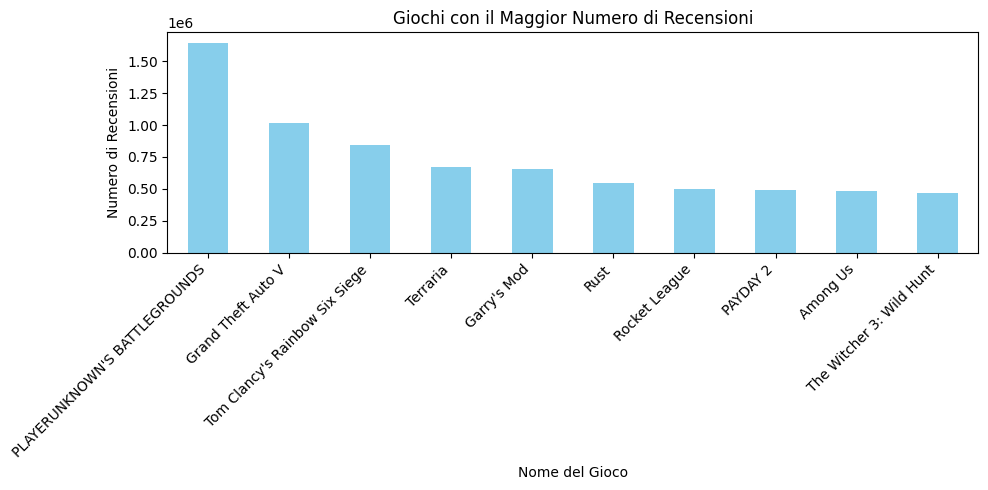

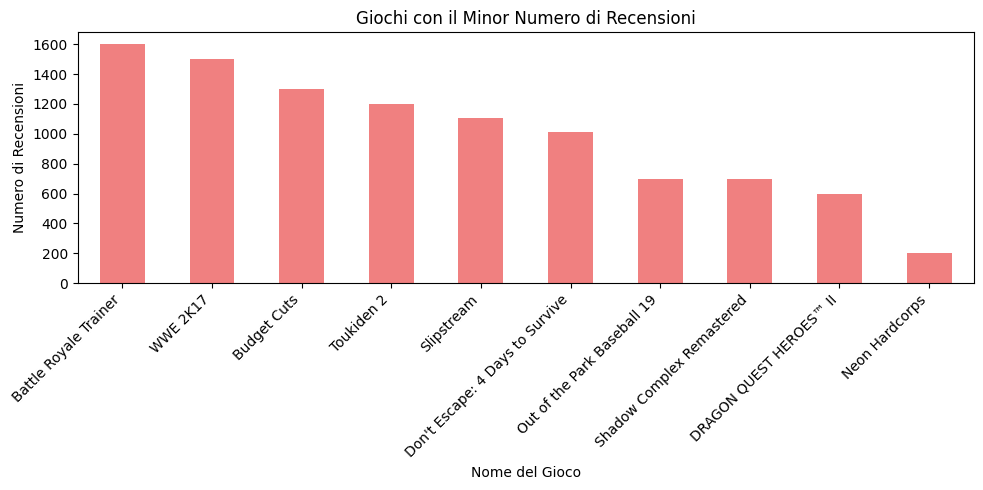

In [22]:

recensioni_per_gioco=df['app_name'].value_counts()
top_giochi=recensioni_per_gioco.head(10)
bottom_giochi=recensioni_per_gioco.tail(10)


plt.figure(figsize=(10, 5))
top_giochi.plot(kind='bar', color='skyblue')
plt.title('games with the most number of reviews')
plt.xlabel('game name ')
plt.ylabel('number of reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

plt.figure(figsize=(10, 5))
bottom_giochi.plot(kind='bar', color='lightcoral')
plt.title('games with the least number of reviews')
plt.xlabel('game name ')
plt.ylabel('number of reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

we can see that the most reviewed game is "PLAYERUNKNOWN'S BATTLEGROUND", the least reviewed is "Neon Hardcorps".
From the graph, the kind of games most played are the shooter and action.
The least played graph is more heterogeneous.

For the top 5 applications by number of reviews, how many reviews came from users who purchased the application versus those who received it for free? Provide a percentage breakdown and highlight any similarities.

In [37]:




# Vedere i valori unici nella colonna 'steam_purchase'
steam_purchase_values = df['steam_purchase'].unique()
print("unique values in 'steam_purchase':", steam_purchase_values)

# Vedere i valori unici nella colonna 'received_for_free'
received_for_free_values=df['received_for_free'].unique()
print("unique values in 'received_for_free':", received_for_free_values)

#frequencies 'steam_purchase'
steam_purchase_counts = df['steam_purchase'].value_counts()
print("frequencies in 'steam_purchase':")
print(steam_purchase_counts)

#frequencies'received_for_free'
received_for_free_counts = df['received_for_free'].value_counts()
print("frequencies in 'received_for_free':")
print(received_for_free_counts)


Valori unici in 'steam_purchase': [ True False]
unique values in 'received_for_free': [False  True]
frequencies in 'steam_purchase':
steam_purchase
True     16842432
False     4904939
Name: count, dtype: int64
frequencies in 'received_for_free':
received_for_free
False    21059310
True       688061
Name: count, dtype: int64


In [29]:



# top 5
top_games=df['app_name'].value_counts().head(5).index

#empty list to store the results
results=[]

#for each top app, calculate the percentage breakdown of reviews by purchase type
for app in top_games:
    app_reviews=df[df['app_name'] == app]
    
    #count purchased vs. received for free
    purchased_reviews=app_reviews[app_reviews['steam_purchase'] == True].shape[0]
    free_reviews=app_reviews[app_reviews['received_for_free'] == True].shape[0]
    total_reviews=app_reviews.shape[0]
    
    #percentages
    purchased_percentage=(purchased_reviews / total_reviews) * 100 
    free_percentage=(free_reviews / total_reviews) * 100 
    
    #reviews with unknown purchase type
    unknown_reviews_percentage=(total_reviews - (purchased_reviews + free_reviews))/total_reviews *100
    
    #append the result as a dictionary
    results.append({
        'app_name':app,
        'purchased_reviews':purchased_reviews,
        'free_reviews':free_reviews,
        'total_reviews':total_reviews,
        'purchased_percentage':purchased_percentage,
        'free_percentage':free_percentage,
        'unknown_percentage':unknown_reviews_percentage
    })

# print results
results_df=pd.DataFrame(results)
print(results_df)
#calculate and print total percentages 
results_df['total_percentage']=results_df['purchased_percentage'] + results_df['free_percentage']
print("Total percentage check:\n", results_df[['app_name', 'total_percentage']])



                         app_name  purchased_reviews  free_reviews  \
0   PLAYERUNKNOWN'S BATTLEGROUNDS            1372721         61443   
1              Grand Theft Auto V             905288         38624   
2  Tom Clancy's Rainbow Six Siege             702505         36300   
3                        Terraria             527762         20154   
4                     Garry's Mod             551250         24765   

   total_reviews  purchased_percentage  free_percentage  unknown_percentage  
0        1644255             83.485895         3.736829           12.777276  
1        1019116             88.830712         3.789951            7.379337  
2         841918             83.441024         4.311584           12.247392  
3         672815             78.440879         2.995474           18.563647  
4         655524             84.093031         3.777894           12.129075  
Total percentage check:
                          app_name  total_percentage
0   PLAYERUNKNOWN'S BATTLEGROUNDS 

we can't see substantial differences from the percentage tab. the sum of the percentages doesn't arrives at 100, because some player didn't buy the game on steam and I get it for free.

lets see the most and least reviewed games.

In [32]:




#group by app_id and app_name,then count the recommendations
recommendation_counts=df.groupby(['app_id', 'app_name', 'recommended']).size().unstack(fill_value=0)

recommendation_counts.columns=['Negative', 'Positive']
#identify them
most_recommended=recommendation_counts['Positive'].idxmax()  # App with the most positive reviews
least_recommended=recommendation_counts['Positive'].idxmin()  # App with the least positive reviews
#counts them
most_recommended_counts=recommendation_counts.loc[most_recommended]
least_recommended_counts=recommendation_counts.loc[least_recommended]

print("Most recommended games:")
print(f"App ID: {most_recommended[0]}, game name: {most_recommended[1]}")
print(f"positive reviews: {most_recommended_counts['Positive']}, negative reviews: {most_recommended_counts['Negative']}")

print("\nLeast recommended Games:")
print(f"App ID: {least_recommended[0]}, game name: {least_recommended[1]}")
print(f"positive reviews: {least_recommended_counts['Positive']}, negative reviews: {least_recommended_counts['Negative']}")


Most Recommended Application:
App ID: 578080, App Name: PLAYERUNKNOWN'S BATTLEGROUNDS
Positive Reviews: 886417, Negative Reviews: 757838

Least Recommended Application:
App ID: 454200, App Name: Neon Hardcorps
Positive Reviews: 89, Negative Reviews: 111


correlation analysis

In [34]:

review_data=df.groupby(['app_id', 'app_name']).agg(
    total_positive=('recommended', lambda x: (x == True).sum()),
    average_score=('weighted_vote_score', 'mean')
).reset_index()
correlation, p_value=pearsonr(review_data['total_positive'], review_data['average_score'])

print(f"Correlation coefficient:{correlation}")
print(f"p-value: {p_value}")


Correlation Coefficient: -0.3032219119311044
P-Value: 4.018202890559056e-08


this result indicates a statistically significant negatuive correlation, it doesn't make sense logically.lets see the scatter plot.

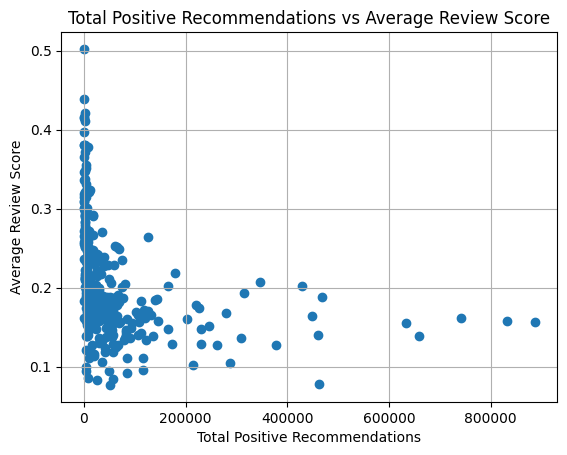

In [35]:
plt.scatter(review_data['total_positive'],review_data['average_score'])
plt.title('Total Positive Recommendations vs Average Review Score')
plt.xlabel('Total Positive Recommendations')
plt.ylabel('Average Review Score')
plt.grid()
plt.show()


we can see some outlier, lets remove them and concentrate on the "mean" population.

Dimensione originale del dataset: (315, 4)
Dimensione del dataset senza outlier: (277, 4)
Correlation Coefficient (senza outlier): -0.47352560173150937
P-Value (senza outlier): 6.915509757387646e-17


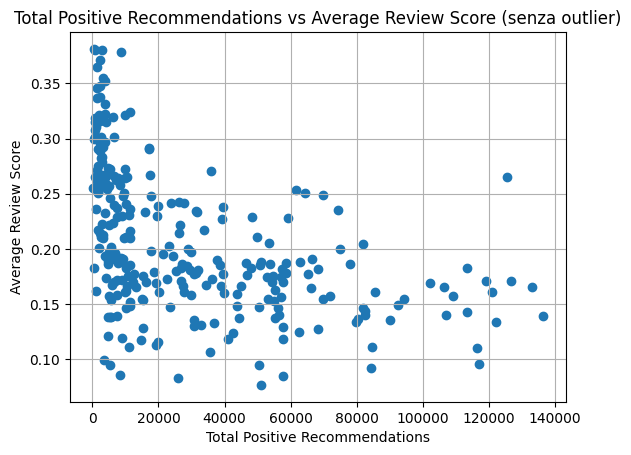

In [36]:




#the mean population is between q1 and q3
Q1=review_data[['total_positive', 'average_score']].quantile(0.25)
Q3=review_data[['total_positive', 'average_score']].quantile(0.75)
IQRange =Q3-Q1

lower_bound=Q1-1.5 * IQRange
upper_bound=Q3+1.5 * IQRange

#remove the outliers in the analysis
filtered_data = review_data[
    (review_data['total_positive']>=lower_bound['total_positive']) & 
    (review_data['total_positive']<=upper_bound['total_positive']) & 
    (review_data['average_score']>=lower_bound['average_score']) & 
    (review_data['average_score']<=upper_bound['average_score'])
]

print(f"dataset dimension:{review_data.shape}")
print(f"outilier free dataset dimension:{filtered_data.shape}")

#repeate the correlation test 
correlation_filtered, p_value_filtered=pearsonr(filtered_data['total_positive'],filtered_data['average_score'])

#output 
print(f"Correlation Coefficient (senza outlier):correlation_filtered}")
print(f"P-Value (senza outlier):{p_value_filtered}")

#scatter plot
import matplotlib.pyplot as plt

plt.scatter(filtered_data['total_positive'],filtered_data['average_score'])
plt.title('Total Positive Recommendations vs Average Review Score (without outlier)')
plt.xlabel('Total Positive Recommendations')
plt.ylabel('Average Review Score')
plt.grid()
plt.show()


this confirm the precedent result, the non high negative correlations could be because the most recommended games tend to attire a specific group of gamers, but in general the game doesnt convince the other players.

### ***RQ3***

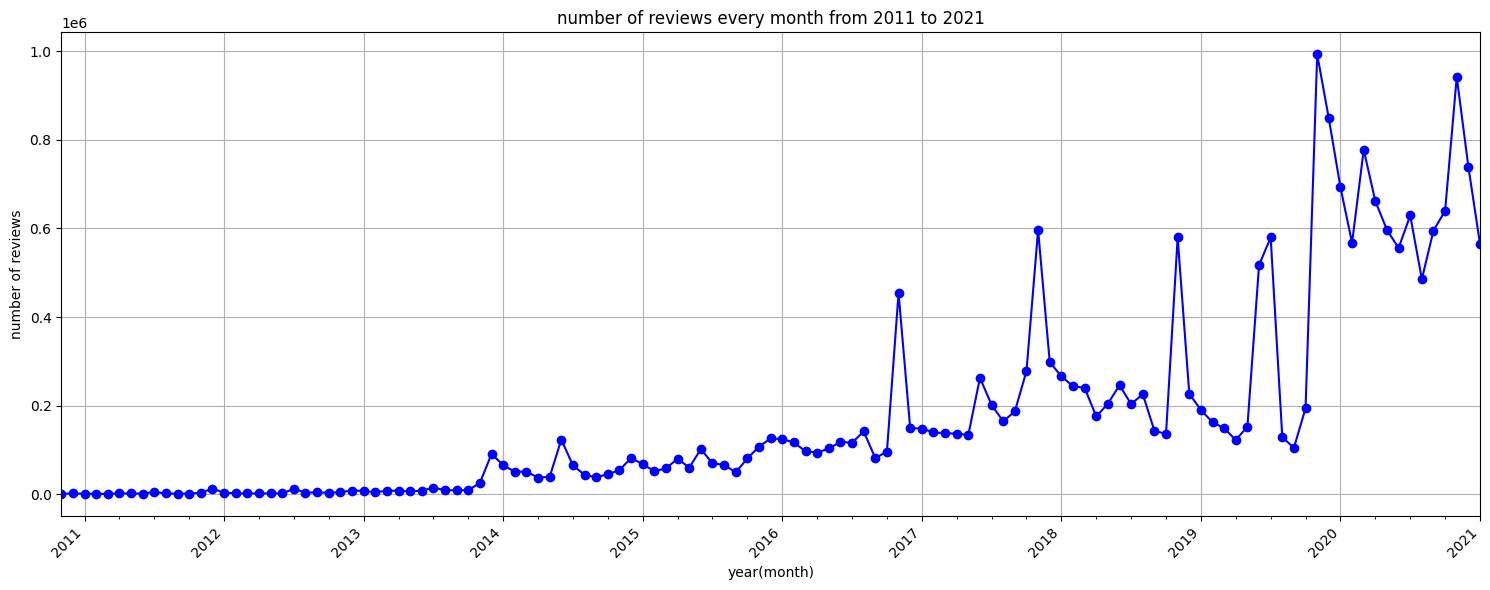

In [29]:
#use the datetime and select the month
df['timestamp_created']=pd.to_datetime(df['timestamp_created'], unit='s')
df['year_month']=df['timestamp_created'].dt.to_period('M')

#grouping by month
monthly_reviews=df.groupby('year_month').size()

#make the graph
plt.figure(figsize=(15, 6))
monthly_reviews.plot(kind='line', marker='o', color='b')
plt.title('number of reviews every month from 2011 to 2021')
plt.xlabel('year(month)')
plt.ylabel('number of reviews')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()
plt.show()

maybe the peaks are seasonal effects like christmas or summer vacations , but to confirm this we have to see if this trends appears in the english (for example) reviewers beacause maybe the chinese vacations are in a different period compared to the english.

/var/folders/wn/p0ly0k3d76955wlp0s0hqndw0000gn/T/ipykernel_15376/2986136353.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_english['timestamp_created'] = pd.to_datetime(df_english['timestamp_created'], unit='s')
/var/folders/wn/p0ly0k3d76955wlp0s0hqndw0000gn/T/ipykernel_15376/2986136353.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_english['year_month'] = df_english['timestamp_created'].dt.to_period('M')


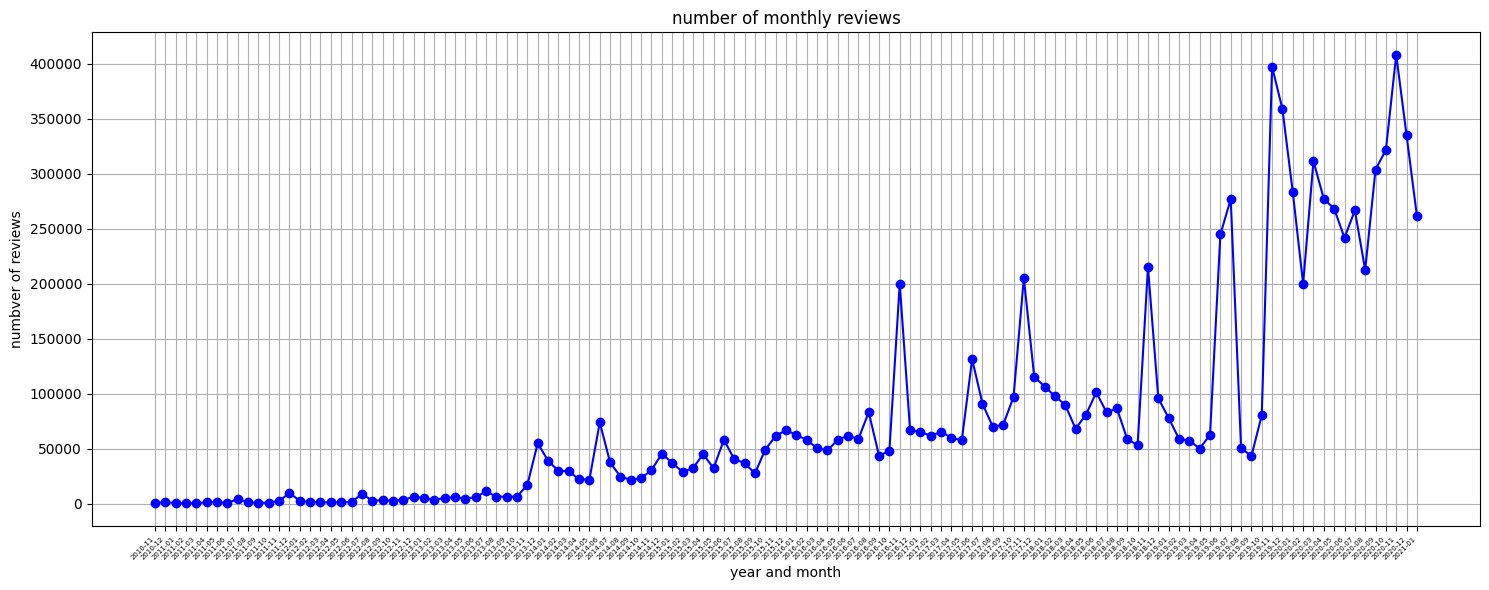

In [28]:


#select only the english reviews
df_english=df[df['language'] == 'english']

# convert to datetime
df_english['timestamp_created'] = pd.to_datetime(df_english['timestamp_created'], unit='s')
df_english['year_month'] = df_english['timestamp_created'].dt.to_period('M')
#group by month
monthly_reviews_english = df_english.groupby('year_month').size()
#graph
plt.figure(figsize=(15,6))  # Aumenta la larghezza (15) e l'altezza (6)
plt.plot(monthly_reviews_english.index.astype(str), monthly_reviews_english, marker='o', color='b')
plt.title('number of monthly reviews')
plt.xlabel('year and month')
plt.ylabel('numbver of reviews')
plt.grid(True)
plt.xticks(rotation=45,ha='right',fontsize=5)
plt.tight_layout()
plt.show()


this confirm that the steam community is more active in the early summer(june) or christmas vacation(november/december.)
we can also see that after the covid-19 the general number of reviews(and so the gamers), has raised noticebly.

let's see the times when people make the most reviews

In [19]:
def count_time_intervals(df, time_intervals):
    
    
    #convert time and select only the hour 
    if df['timestamp_created'].dtype!='datetime64[ns]':
        df['timestamp_created']=pd.to_datetime(df['timestamp_created'], unit='s')
    df['hour']=df['timestamp_created'].dt.hour
    #labels and bins for the time interval
    labels=[f'{start:02d}:00 - {end-1:02d}:59' for start, end in time_intervals]
    bins=[start for start, end in time_intervals] + [time_intervals[-1][1]]
    #create a new column 
    df['time_group']=pd.cut(df['hour'],bins=bins,labels=labels,right=False,include_lowest=True)
    # group by time 
    reviews_per_time_group = df.groupby('time_group').size()
    
    return reviews_per_time_group



/var/folders/wn/p0ly0k3d76955wlp0s0hqndw0000gn/T/ipykernel_15376/3938839406.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reviews_per_time_group = df.groupby('time_group').size()


time_group
00:00 - 02:59    2351647
03:00 - 05:59    2245879
06:00 - 10:59    3925459
11:00 - 13:59    2971997
14:00 - 16:59    3377469
17:00 - 19:59    3257494
20:00 - 23:59    3617426
dtype: int64
[0.1081347717845987, 0.10327128736618325, 0.18050269156671858, 0.13666005881814405, 0.15530470326735127, 0.1497879444830366, 0.16633854271396759]


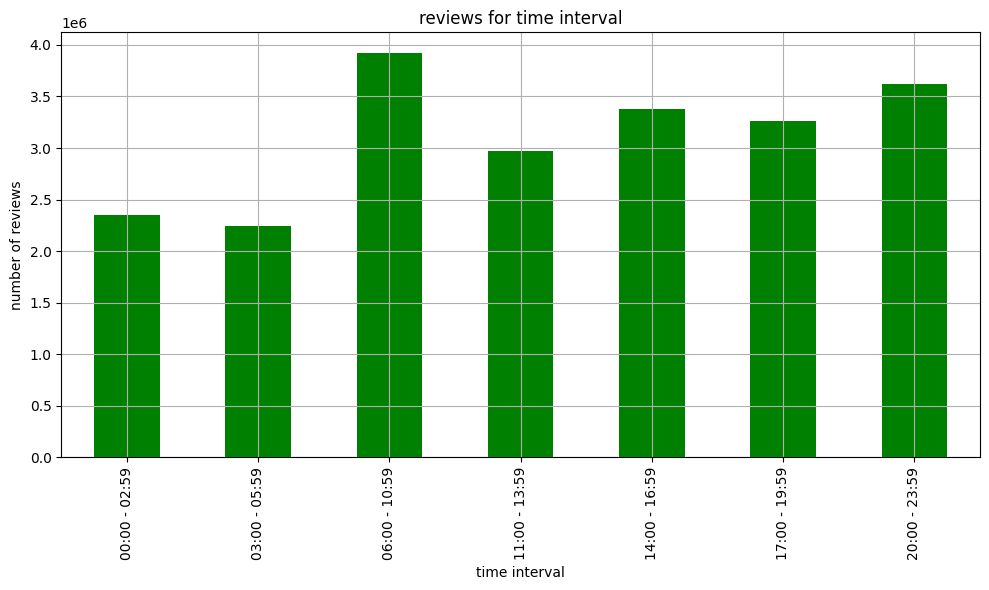

In [30]:

#define the time intervals
time_intervals = [
    (0,3),   #00:00 - 02:59
    (3,6),   #03:00 - 05:59
    (6,11),  #06:00 - 10:59
    (11,14), #11:00 - 13:59
    (14,17), #14:00 - 16:59
    (17,20), #17:00 - 19:59
    (20,24)  #20:00 - 23:59
]
#count the reviews for interval
reviews_per_interval=count_time_intervals(df, time_intervals)
reviews_per_interval_percentage=[i/sum(reviews_per_interval) for i in reviews_per_interval]
print(reviews_per_interval)
print(reviews_per_interval_percentage)
#graph
plt.figure(figsize=(10, 6))
reviews_per_interval.plot(kind='bar', color='g')
plt.title('reviews for time interval')
plt.xlabel('time interval')
plt.ylabel('number of reviews')
plt.grid(True)
plt.tight_layout()
plt.show()


as we can see, the time interval with more reviews is in the morning(6-11) followed by the evening(20-24) and afternoon(14-20).
We can conclude that in the night there are less reviews due to the fact that the people sleep in that time. 